# Supervised Machine Learning for Cardiovascular Risk Detection

**Autor:** Juan Francisco Rodríguez

**Date:** 30/08/2024

**Github:** https://github.com/jfrg99/Heart-Disease-Classification-using-Supervised-Machine-Learning

## Table of Contents

1. Introduction
2. Methodology
3. Tuning Hyperparameters
    1. Logistic Regression
    2. K Nearest Neighbors
    3. Support Vector Machines
    4. Decision Trees
4. Metric Comparison
    1. Confusion Matrices
    2. ROC Curves
    3. Precision-Recall Curves
    4. Logarithmic Loss
    5. Cohen's Kappa
    6. Comparing Metrics
5. Conclusion

## 1. Introduction

The second part of this project involves applying various **supervised machine learning classification** models to our preprocessed dataset to predict the target variable, thereby creating a model capable of diagnosing whether a patient is at risk of heart failure.

We will explore and compare the performance of the following classification models: Logistic Regression, K Nearest Neighbors (KNN), Support Vector Machines (SVM) and Decision Trees.

For each kind of model, we will perform hyperparameter tuning to optimize their performance and select the best parameters using their $F_1$-Score. Then, we will train the best models.

Finally, we will compare the best Logistic Regression, KNN, SVM and Decision Trees models using various evaluation metrics: accuracy, precision, recall, $F_1$-score, AUC, Log Loss and Cohen's Kappa.

The dataset for this project was obtained from the *Kaggle* website and can be found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). Although small, this dataset contains some of the most important features that related to potential heart disease.

## 2. Methodology

Now, we are going to apply these machine learning models to our dataset. We will apply the same process to each one of these model in order to compare them.

To do this, we will use the data set already formatted, that is, normalized and encoded. Let's call this DataFrame as `dataset`.

In [4]:
import pandas as pd

dataset = pd.read_csv("datasets/heartdata_final.csv")
dataset.head()

,Age,F,M,RBP,Chol,MaxHR,Oldpeak,CPT_ASY,CPT_ATA,CPT_NAP,CPT_TA,RECG_LVH,RECG_N,RECG_ST,STS_D,STS_F,STS_U,EAY,EAN,Disease
0,0.244898,0.0,1.0,0.500000,0.393822,0.788732,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.428571,1.0,0.0,0.666667,0.183398,0.676056,0.409091,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.183673,0.0,1.0,0.416667,0.382239,0.267606,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
3,0.408163,1.0,0.0,0.483333,0.249035,0.338028,0.465909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.530612,0.0,1.0,0.583333,0.212355,0.436620,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0


First, we split the features and the target variable.

In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

There are several ways to proceed when applying machine learning models. I will use a cross-validation method to find the best hyperparameters for each model. Specifically, I will use ``GridSearchCV``, which automates this process. By default, it implements a ``StratifiedKFold`` data split. This will generate 5 splits of the data, ensuring that the proportion of the classes in the target variable $y$ is maintained.

Then, we will use `train_test_split`, specifying the `stratify` parameter to the target variable $y$, for train the final model and get the predictions.

In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Splitting the data for fit the final models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

## 3. Tunning Hiperparameters

### 3.1 Logistic Regression

Logistic regression is a classification model used to predict the probability of an observation belonging to one of two possible classes, making it suitable for binary classification problems. It is based on the use of the *sigmoid funciton*:
$$ \sigma(z) = \frac{1}{1 + e^{-z}}, $$
which returns values between $0$ and $1$. By taking a classification threshold (usually $0.5$), it is determined whether a patient belongs to one class or another, i.e., whether they have a heart problem or not.

In `sklearn` we have the `LogisticRegression` class. The parameters we can vary are the penalty (``None``, ``l1``, ``l2`` or ``elasticnet``)and the regularization parameter `C`. So we first set the parameter dictionary:

In [7]:
param_grid_log = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'],
     'C': [0.01, 0.1, 1, 10, 100],
     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]} # l1_ratio is exclusive to elasticnet
]

Now, let's define the model and apply cross-validation. As we are considering `l1`, `l2` and `elasticnet` penalties, we set the `solver` to `saga`.

In [8]:
from sklearn.linear_model import LogisticRegression

# Model instance
model_log = LogisticRegression(solver = "saga",max_iter=10000, random_state=10)

In [9]:
# setting the grid search
grid_search_log = GridSearchCV(estimator=model_log, param_grid=param_grid_log, cv=5, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search_log.fit(X, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=10,
                                          solver='saga'),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                          'penalty': ['elasticnet']}],
             scoring='f1')

We can access to the best parameters and best score using some attributes of the class:

In [10]:
best_params_log = grid_search_log.best_params_
best_score_log = grid_search_log.best_score_
print("Best Parameters:",best_params_log)
print("Best Score:",best_score_log)

Best Parameters: {'C': 0.1, 'l1_ratio': 0.9, 'penalty': 'elasticnet'}
Best Score: 0.870486104709191


Finally, we define the best model:

In [11]:
# Final model with the best parameters
LR = LogisticRegression(solver='saga',**best_params_log,random_state=10)

# Fitting it with train data
LR.fit(X_train, y_train)

LogisticRegression(C=0.1, l1_ratio=0.9, penalty='elasticnet', random_state=10,
                   solver='saga')

### 3.2 K Nearest Neighbors

K Nearest Neighbors is a non-parametric model that classifies a data point (a patient) based on the majority votes of its nearest neighbors and can use different distances to obtain the nearest neighbors. The main disadvantage is that it can be computationally expensive.

This method does not use explicit training of the model, but when we add a new data, it calculates the distances with the training data.

With `sklearn` `KNeighborsClassifier` class. In this case the possible hyperparameters to tune the model are the number of neighbors, `n_neighbors`, the weights, `weights`, and the metrics, `metric`.

This time we code all together in the same cell.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


# setting the grid search
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search_knn.fit(X, y)

# Params and scores
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print("Best Parameters:",best_params_knn)
print("Best Score:",best_score_knn)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score: 0.8627199194852244


In [13]:
# Final model with the best parameters
KNN = KNeighborsClassifier(**best_params_knn)
# Fitting it with all the data
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

### 3.3 Support Vector Machines

SVM is a supervised learning algorithm that classifies data (patients) by searching for the hyperplane that best separates both classes in the feature space.

In this case, we will use the `SVC` class, so the possible hyperparameters we can vary are the regularization parameter `C`, the `kernel`, the parameter `gamma`, and some certain parameters for some kernels, such as the `degree` for the `poly` kernel and the `coef0` coeficent for `poly` or `sigmoid`.

Also, we set `probability = True` in the model instance in order to plot the ROC curve later.

In [14]:
from sklearn.svm import SVC

model_svc = SVC(probability=True,random_state=10)

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

# setting the grid search
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid_svc, cv=5, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search_svc.fit(X, y)

# Params and scores
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print("Best Parameters:", best_params_svc)
print("Best Score:", best_score_svc)

Best Parameters: {'C': 0.1, 'coef0': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Score: 0.8674505375496544


In [15]:
# Final model with the best parameters
SVM = SVC(**best_params_svc, probability=True,random_state=10)
# Fitting it with all the data
SVM.fit(X_train, y_train)

SVC(C=0.1, coef0=0.1, degree=2, gamma='auto', kernel='sigmoid',
    probability=True, random_state=10)

### 3.4 Decision Trees

Decision Trees is a method based on dividing the feature space into homogeneous regions using binary decisions. The tree is built by recursively dividing the dataset into smaller subsets based on a feature that maximizes the separation of classes (for classification). The new data (patient) will pass through each node based on the decision made until it reaches the final node, which will determine its category.

We use `DecisionTreeClassifier`, and the main parameters to vary are the maximum depth and the maximum number of features.

In [16]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=10)

param_grid_dt = {
    'criterion': ['gini'],
    'max_depth':range(1, 9, 1),
    'max_features': range(1,  18)}


# setting the grid search
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search_dt.fit(X, y)

# Params and scores
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print("Best Parameters:",best_params_dt)
print("Best Score:",best_score_dt)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 15}
Best Score: 0.8610165074788563


In [17]:
DT = DecisionTreeClassifier(**best_params_dt,random_state=10)

DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=15, random_state=10)

### 3.5 Adding Predicted Labels to Test Dataset

Now let's create a new dataset adding new columns for the predicted labels using each model. It is a better choice to insert them into the imputed dataset since it is more easy to interpret than use the normalized and encoded one.

In [58]:
# Getting the indices of the test set
indices = X_test.index

# Looking for the corresponding patients
dataset_original = pd.read_csv("datasets/heartdata_imputed.csv")
predict_dataset = dataset_original.loc[indices]
predict_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1


#### Logistic Regression

Here let's also insert a column with the predicted probabilites.

In [59]:
# Probabilities
prob_log = LR.predict_proba(X_test)
y_log_pred = LR.predict(X_test)
predict_dataset['Log_Prob'] = prob_log[:, 1]
predict_dataset['Log_Predict'] = y_log_pred
predict_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Log_Prob,Log_Predict
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0,0.408035,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0,0.148935,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0,0.073004,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,0.073004,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1,0.919596,1


#### KNN

In [60]:
y_knn_pred = KNN.predict(X_test)
predict_dataset['KNN_Predict'] = y_knn_pred
predict_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Log_Prob,Log_Predict,KNN_Predict
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0,0.408035,0,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0,0.148935,0,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0,0.073004,0,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,0.073004,0,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1,0.919596,1,1


#### SVM

In [80]:
y_svm_pred = SVM.predict(X_test)
predict_dataset['SVM_Predict'] = y_knn_pred
predict_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Log_Prob,Log_Predict,KNN_Predict,SVM_Predict
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0,0.408035,0,0,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0,0.148935,0,0,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0,0.073004,0,0,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,0.073004,0,0,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1,0.919596,1,1,1


#### Decision Trees

In [81]:
y_tree_pred = SVM.predict(X_test)
predict_dataset['Tree_Predict'] = y_tree_pred
predict_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Log_Prob,Log_Predict,KNN_Predict,SVM_Predict,Tree_Predict
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0,0.408035,0,0,0,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0,0.148935,0,0,0,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0,0.073004,0,0,0,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,0.073004,0,0,0,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1,0.919596,1,1,1,1


In [82]:
# Saving the dataset
predict_dataset.to_csv("datasets/heartdata_predict.csv", index=True)

## 4. Metric Comparison

Now, it's time to compare the four models created. To do that, we can use different plots. So let's import some common libraries and define some common objects.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_names = X.columns
models = [LR, KNN, SVM, DT] 
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Trees']
X_test_df = pd.DataFrame(X_test, columns=feature_names)

### 4.1 Confusion Matrices

A confusion matrix evaluates the performance of a classification model comparing the model's predictions with the actual values, allowing to identify how many times the model has been right or wrong in each category. It shows:
- **TP**: The number of true positives.
- **TN**: The number of true negatives.
- **FP**: The number of false positives.
- **FN**: The number of false negatives.

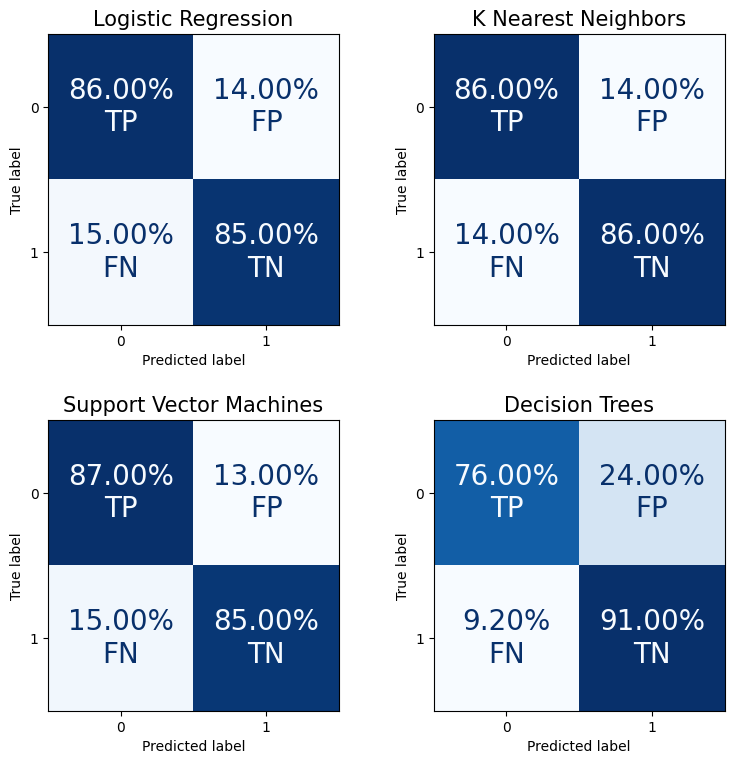

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# figure
sns.reset_orig()
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Iterating with each model
for model, name, ax in zip(models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')  # Normalizing the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(name, fontsize=15)
    for i, labels in enumerate(ax.texts):
        labels.set_fontsize(20)
        labels.set_text(f'{float(labels.get_text()):.2%}\n{["TP", "FP", "FN", "TN"][i]}')  # Formatting as percentage and adding label

plt.tight_layout(pad=2.0)
plt.show()

Some metrics that come from this matrix are:

- **Precision**. It indicates how many of the positive predictions are actually correct.
$$ \text{Precision} = \frac{ \text{TP} }{ \text{TP} + \text{FP} }. $$
- **Recall**. It ndicates how many of the actual positive cases have been correctly identified by the model.
$$ \text{Recall} = \frac{ \text{TP} }{ \text{TP} + \text{FN} }. $$
- **TPR**: The true positive rate is given by:
$$ \text{TPR} = \frac{ \text{TP} }{ \text{TP} + \text{FN}}. $$
- **FPR**: The false positive rate is given by:
$$ \text{FPR} = \frac{ \text{FP} }{ \text{FP} + \text{TN}}. $$

- **Accuracy**: It measures the proportion of correct predictions made by the model in relation to the total predictions.
$$ \text{Accuracy} = \frac{ \text{TP} + \text{TN} }{ \text{TP} + \text{TN} + \text{FP} + \text{FN}}. $$
- $\mathbf{F_1}$**-Score**: It is the armonic mean of precision and recall:
$$ F_1-\text{Score} = 2 \frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}. $$

### 4.2 ROC Curves

A receiver operating characteristic curve, or ROC curve, illustrates the performance of a binary classifier model at varying threshold values. The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting. We can calculate the area under this curve, that allows us a better comparison.

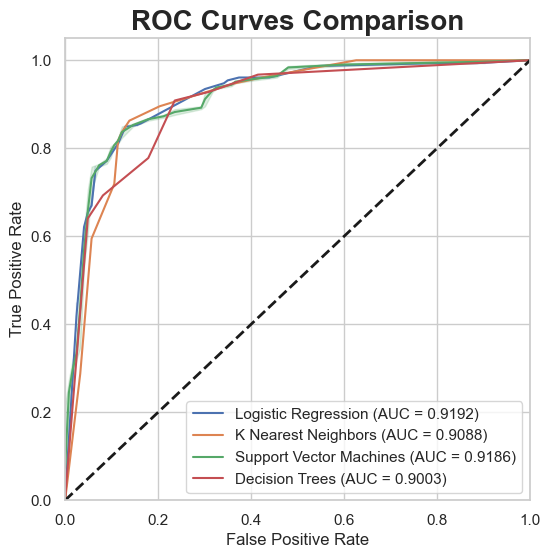

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

auc_dict = {}

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test_df)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    auc_dict[name] = roc_auc
    sns.lineplot(x=fpr, y=tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Añadir la línea diagonal de no discriminación
sns.lineplot(x=[0, 1], y=[0, 1], color='k', linestyle='--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves Comparison", fontsize=20, fontweight='bold')
plt.legend(loc='lower right')
plt.show()
sns.reset_orig()

### 4.3 Precision-Recall Curves

The precision-recall curve is generated by plotting precision versus recall for different decision thresholds.

A curve closer to the point $(1,1)$ indicates a better model. The area under this curve is known as **average precision score** or **AP**, and can be used to compare models. An AP near to 1 means a better model.

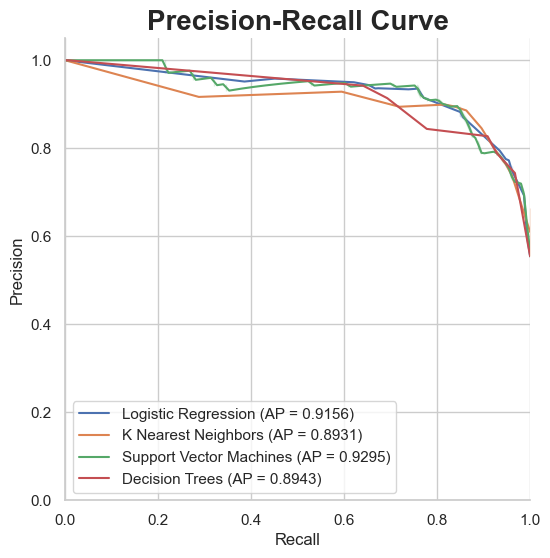

In [21]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

ap_dict = {}

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test_df)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    ap_dict[name] = avg_precision
    sns.lineplot(x=recall, y=precision, label=f'{name} (AP = {avg_precision:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Precision-Recall Curve',  fontsize=20, fontweight='bold')
sns.despine()
plt.show()
sns.reset_orig()


### 4.4 Logarithmic Loss

Log loss or cross-entropy loss is a metric used to evaluate the performance of classification models, especially in binary and multiclass classification problems, that measures the uncertainty of the model's predictions. The further away the predictions are from the true labels, the higher the log loss.

Log loss penalizes incorrect predictions and predictions that are overly confident but incorrect. A lower log loss indicates better model performance. It is given by:
$$ \text{Log Loss} = - \frac{1}{N} \sum\limits_{i=1}^N \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i)  \right],$$
where:
- $N$ is the number of samples.
- $y_i$ is the true label of the $i$ sample, it is $0$ or $1$.
- $p_i$ is the probability predicted by the model that sample $i$ belongs to the positive class.

In [22]:
from sklearn.metrics import log_loss

log_loss_dict = {}

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test_df)
    loss = log_loss(y_test, y_pred_proba)
    log_loss_dict[name] = loss

### 4.5 Cohen's Kappa

Cohen's kappa is a metric used to assess the degree of agreement between two evaluators or classifiers. It is especially useful when one wants to measure the consistency between two sets of classifications that may have more than two categories. It is given by
$$ \kappa = \frac{P_0 - P_e}{1 - P_e}, $$
where:
- $P_0$ is the observed agreement.
- $P_e$ is the expected agreement.

$\kappa$ takes values between $-1$ and $1$, where $1$ means a perfect agreement, $0$ a random agreement, and negatives values indicate agreement worse than a random choice.


In [24]:
from sklearn.metrics import cohen_kappa_score

kappa_dict = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_df)
    kappa = cohen_kappa_score(y_test, y_pred)
    kappa_dict[name] = kappa

### 4.6 Comparing Metrics


Let's compare all metrics together.

In [25]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(model, X_test, y_test):
    yt = y_test
    yp = model.predict(X_test)
    results_pos = {}
    results_pos['Accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['Recall'] = recall
    results_pos['Precision'] = precision
    results_pos['F1 Score'] = f_beta
    return results_pos

metrics_results = {}

for model, name in zip(models, model_names):
    metrics_results[name] = evaluate_metrics(model, X_test, y_test)
    metrics_results[name]["AUC"] = auc_dict[name]
    metrics_results[name]["AP"] = ap_dict[name]
    metrics_results[name]["Log_Loss"] = log_loss_dict[name]
    metrics_results[name]["Cohen's Kappa"] = kappa_dict[name]  

error_df = pd.DataFrame(metrics_results).T
display(error_df)

,Accuracy,Recall,Precision,F1 Score,AUC,AP,Log_Loss,Cohen's Kappa
Logistic Regression,0.855072,0.849673,0.884354,0.866667,0.919204,0.915598,0.370106,0.708076
K Nearest Neighbors,0.862319,0.862745,0.885906,0.874172,0.908842,0.893075,0.832094,0.722231
Support Vector Machines,0.858696,0.849673,0.890411,0.869565,0.918646,0.929528,0.363140,0.715599
Decision Trees,0.844203,0.908497,0.827381,0.866044,0.900340,0.894341,0.374422,0.680865


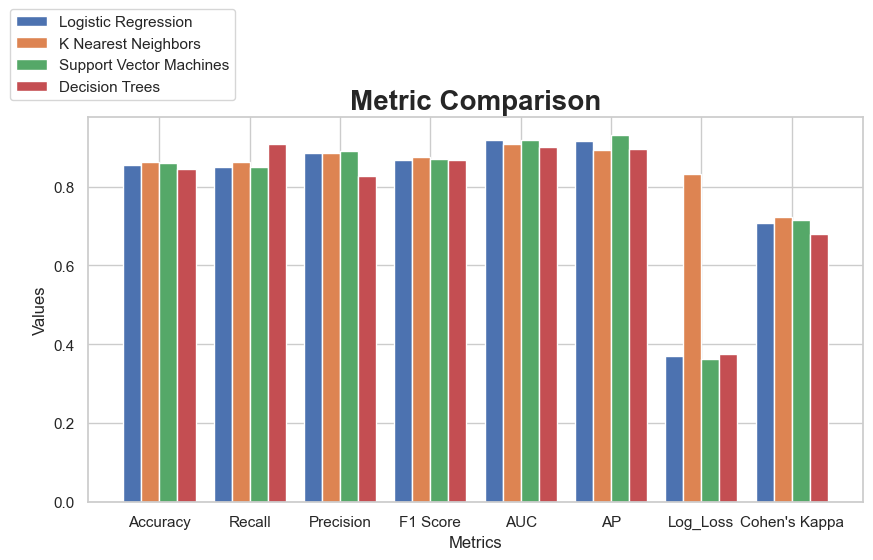

In [26]:
metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score','AUC','AP','Log_Loss',"Cohen's Kappa"]
x = np.arange(len(metrics_names))
width = 0.2

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

for i, (name, metrics) in enumerate(metrics_results.items()):
    values = [metrics[metric] for metric in metrics_names]
    ax.bar(x + i*width, values, width, label=name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Metric Comparison',  fontsize=20, fontweight='bold')
ax.set_xticks(x + width / 2 + 0.2)
ax.set_xticklabels(metrics_names)
ax.legend(loc='upper right', bbox_to_anchor=(0.2, 1.3))

plt.show()
sns.reset_orig()

### 4.7 Conclusion

- **Support Vector Machines** has the best Precision ($0.890411$) and AP ($0.929528$), and it also has a good AUC ($0.918646$) and Log_Loss ($0.363140$).
- **Logistic regression** has the best AUC (0.919204) and a good AP ($0.915598$).
- **K Nearest Neighbors** has the best Accuracy ($0.862319$) and Recall ($0.862745$), but its Log_Loss is quite high ($0.832094$).
- **Decision Trees** has the best Recall ($0.908497$), but its Precision ($0.827381$) and Cohen’s Kappa ($0.680865$) are lower.

Overall, **Support Vector Machines** seems to be the best model in terms of a balance between the key metrics like Precision, AUC, AP, and Log_Loss. Meanwhile, **K Nearest Neighbors** has the worse performance.

## 5. Important Features

When we create models, there are some features that have a greater impact on the final decision than others. Let's see which of these features actually have a greater importance in classifying heart diseases.

### 5.1 Logistic Regression Coefficients

In logistic regression this is straightforward since each variable has an associated coefficient, it is an attribute of the model itself.

In [27]:
# Obtaining the coefficients
coef_log = LR.coef_[0]
# Features names
features_aux = X.columns

# Combining them into a dataframe.
coef_log_df = pd.DataFrame({
    'Feature': features_aux,
    'Coefficient': coef_log
})

coef_log_df = coef_log_df.sort_values(by='Coefficient', ascending=False)

display(coef_log_df.T)

,7,15,2,17,0,10,14,13,12,11,9,6,5,4,3,8,18,1,16
Feature,CPT_ASY,STS_F,M,EAY,Age,CPT_TA,STS_D,RECG_ST,RECG_N,RECG_LVH,CPT_NAP,Oldpeak,MaxHR,Chol,RBP,CPT_ATA,EAN,F,STS_U
Coefficient,1.317088,0.424898,0.400969,0.361635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.053796,-0.358827,-0.397487,-1.663608


We can plot them into a barplot.

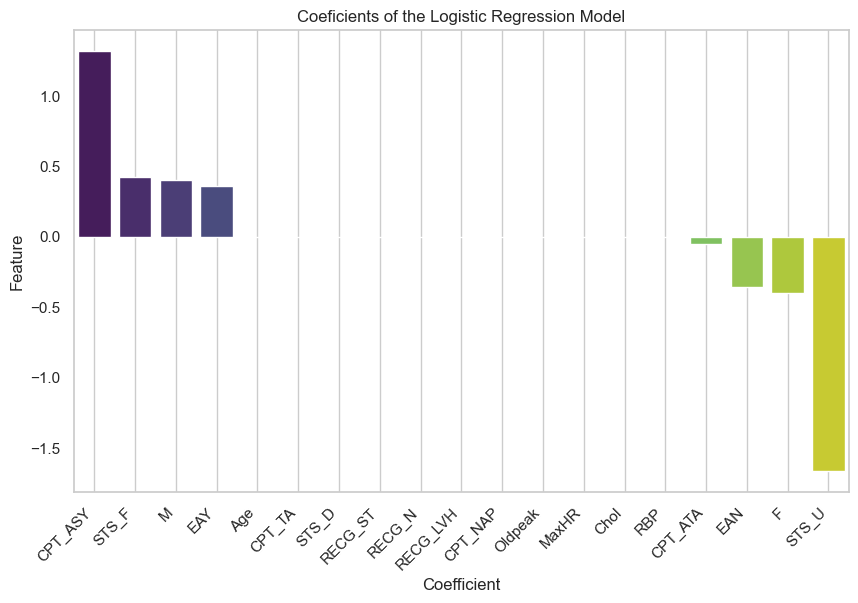

In [28]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=coef_log_df, hue='Feature', palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coeficients of the Logistic Regression Model')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid()
plt.show()

In [29]:
print(coef_log_df)

     Feature  Coefficient
7    CPT_ASY     1.317088
15     STS_F     0.424898
2          M     0.400969
17       EAY     0.361635
0        Age     0.000000
10    CPT_TA     0.000000
14     STS_D     0.000000
13   RECG_ST     0.000000
12    RECG_N     0.000000
11  RECG_LVH     0.000000
9    CPT_NAP     0.000000
6    Oldpeak     0.000000
5      MaxHR     0.000000
4       Chol     0.000000
3        RBP     0.000000
8    CPT_ATA    -0.053796
18       EAN    -0.358827
1          F    -0.397487
16     STS_U    -1.663608


### 5.2 Decision Trees Feature Importance

Here, it is also straightforward, `DecisionTreeClassifier` does not use coefficients, but it has a feature importance attribute.

In [30]:
# Supongamos que `decision_tree` es tu modelo entrenado
importances_dt = DT.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_dt_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_dt
}).sort_values(by='Importance', ascending=False)

display(feature_dt_df.T)

,16,7,4,2,6,0,12,17,15,14,13,9,11,10,1,8,5,3,18
Feature,STS_U,CPT_ASY,Chol,M,Oldpeak,Age,RECG_N,EAY,STS_F,STS_D,RECG_ST,CPT_NAP,RECG_LVH,CPT_TA,F,CPT_ATA,MaxHR,RBP,EAN
Importance,0.68069,0.183687,0.056051,0.049546,0.030026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


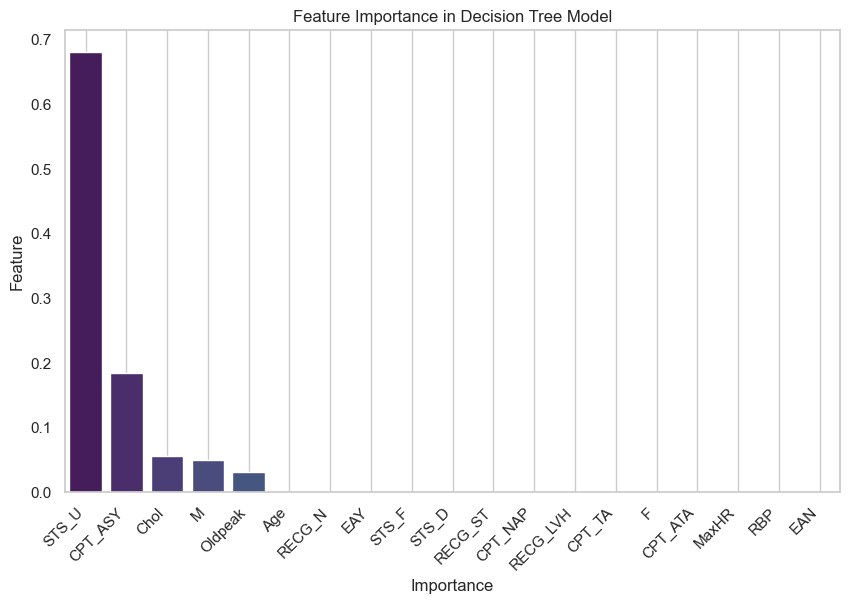

In [31]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_dt_df, hue='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
plt.grid()
plt.show()

### 5.3 KNN and SVM Features Permutation

These two methods do not have a direct way to measure the influence of the features on them, but there is a general technique based on permutations.

**Permutation feature importance** is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset. The idea here is to permute the features in the model and measure the impact on the result. With that, we can give an “importance” to each feature. It is implemented in the `permutation_importance` function of the `sklearn.inspection` module (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)).

How does it work?

1. **Reference Metric**. First, we evaluate the performance of a model obtaining a reference metric (`accuracy`, `f1`, etc).
2. **Permutation**. For each feature, its values are permuted. Then, the model is evaluated again, obtaining a new value for the chosen metric.
3. **Importance**. For each feature, we define its importance as the difference between the reference metric and the new metric.
4. **Repeat**. We can repeat this process `n_repeats` times.

What we obtain?

The output is a dictionary containing the following data:
- `importances`. A `n_features`$\times$`n_repeats` array containing the importances of all featues.
- `importances_mean`. An array containing the mean importance for each feature across those repetitions.
- `importances_std`. An array containing the standard deviation importance for each feature across those repetitions.

How to interpret the results?

- **Standard Deviation**. A *std* near $0$ implies little variability of the metric for the different permutations. Values far from $0$ imply a lot of variability, which may indicate instability and that the feature is not consistent with the model.
- **Mean**. A mean importance near 0 implies that, on average, the model is having the same performance for all permutations, which can mean that the feature has low importance to the model.
    - If the mean is negative, then permutations imply better metrics. So the feature may be introducing noise to the model.
    - If the mean is positive, then the permutations are obtaining worse metrics, which implies that the feature is important for the model.

Then, we want a positive mean and a standard deviation near to $0$.

All this can be hard to understand, but it is easier if we boxplots:
- The **width** of the boxplot indicates more variability.
- The **position** of the boxplot: If it is postive, it means that more importances are positives.
- The **outliers** of the boxplot can indicate that there are certain permutations with a high variability.

The most important features will have their boxplots above 0 (all importances are positive) and also a small width (low variability). Additionally, it is important to have few or no outliers.

In [32]:
from sklearn.inspection import permutation_importance

# Results for knn and svm
result_knn = permutation_importance(KNN, X_test, y_test, n_repeats=60, random_state=10)
result_svm = permutation_importance(SVM, X_test, y_test, n_repeats=60, random_state=10)

# Creating a df
importance_knn_df = pd.DataFrame(result_knn.importances.T, columns=X.columns)
importance_svm_df = pd.DataFrame(result_svm.importances.T, columns=X.columns)

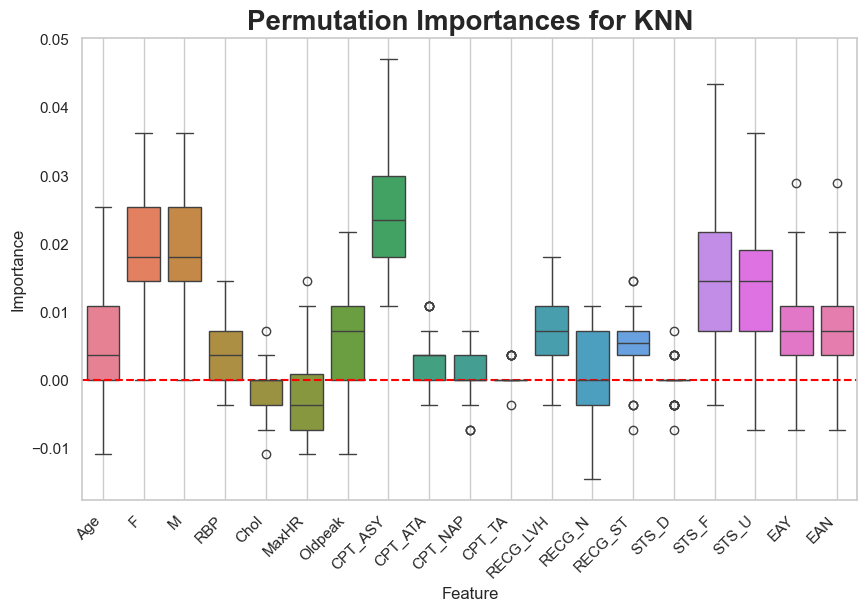

In [33]:
# boxplots
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=importance_knn_df)
plt.title('Permutation Importances for KNN',fontsize=20,fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') 
plt.axhline(0, color='red', linestyle='--')
plt.grid()
plt.show()

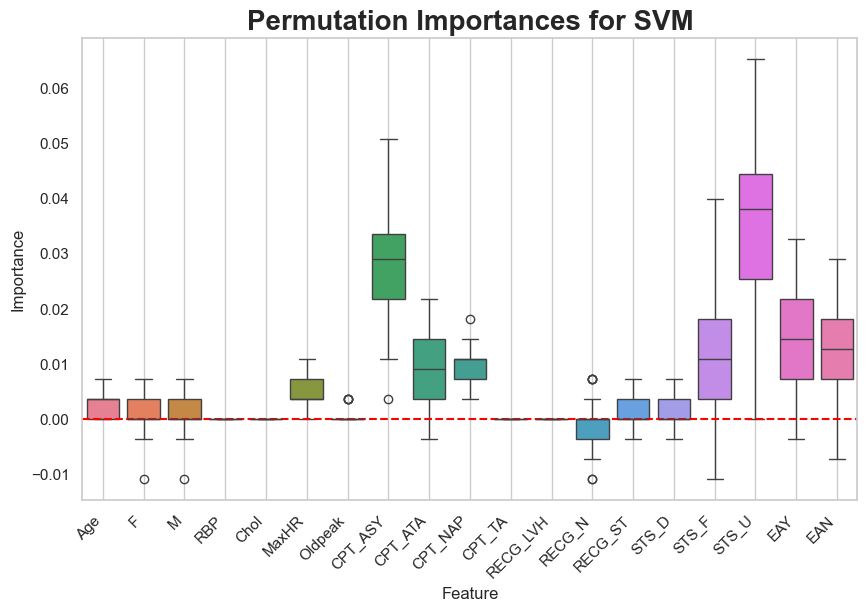

In [34]:
# boxplots
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=importance_svm_df)
plt.title('Permutation Importances for SVM',fontsize=20,fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') 
plt.axhline(0, color='red', linestyle='--')
plt.grid()
plt.show()

### 5.4 Summary

#### Logistic Regression 

The most important features are STS_U (negative) and CPT_ASY (positive). The features with a moderade importance are STS_F (positive), M (positive), F (negative), EAY (positive), and EAN (negative). Finally, CPT_ATA (negative) has a very little influence.

Then, we can conclude that, for logistic regression, the important features are:
- **ST Slope**. Mainly the upsploping case.
- **Exercise Angina**. EAY is positive and EAN is negative, so there is a direct relationship between anginas induced by exercise and the heart disease.
- **Chest Pain Type**. Mainly asymptomatic and atypical angina.
- **Sex**. Male positive and Female negative.

#### Decision Trees

The most important features are:
- **ST Slope**. In this case only Upsloping class.
- **Chest Pain Type**. In this case only Asyntomatic class.
- **Cholesterol**.
- **Sex**. In this case only Male class.
- **Oldepeak**.

#### KNN

Here we use the shape of the boxplot to decide the importance of the features.

- **Chest Pain Type**. This feature is obviously important, and the distribution of importance is:
    - The most important subcategory is Asyntomatic, all permutations are positives but the is much variability. Also there are not outliers.
    - Atypical angina and non atypical angina are also important, with positives values and not much variability.
    - Typical angina is the less important. but it has not variability, which shows consistence.

- **Sex**. This feature is also important. Both Male and Female have identical boxplots with positives values and a few varaibility.

- **Age**. Mostly positive values.

- **ST Slope**. Their subcategories has positive values but a high variability. Most important are Flat and Upsloping.

- **Exercise Angina**. Both subclasses with identical boxplots.
- **Resting ECG** also has a little influence.
- **Olpeak** has positives values but much variability.
- **Cholesterol** and **Maximum Heart Rate** have negatives values, indicating low importance.

The case of chest pain type is possibly influenced by the fact that its subcategories are distributed in a very unbalanced way. A simmilar situation occurs with ST Slope.

#### SVM

- **Chest Pain Type**. Similar to the KNN case, this feature is also important:
    - The most important subcategory is Asyntomatic.
    - Atypical angina and non atypical angina are also important.
    - Typical angina is the less important.

- **Sex**. Both Male and Female have identical boxplots with positives values and a few varaibility.

- **Age**. Same case than Sex.

- **ST Slope**. Their subcategories has positive values but a high variability. Most important are Flat and Upsloping again.

- **Exercise Angina**. Also very important in both subcategories.

- **Olpeak**, **Cholesterol** and **Resting Blood Presure** have values near 0 and no variability, which means consistency.

- **Maximum Heart Rata** has a few of importance.

#### **Conclusion**

The most important features for all methods seem to be ST Slope, Chest Pain Type, Sex and Exercise Angina induce by exercise.

## 6 Visualization of the models

### 6.1 Decision Trees

The module `tree` of `sklearn` provides the built-in function `plot_tree` to visualize the Decision Tree.

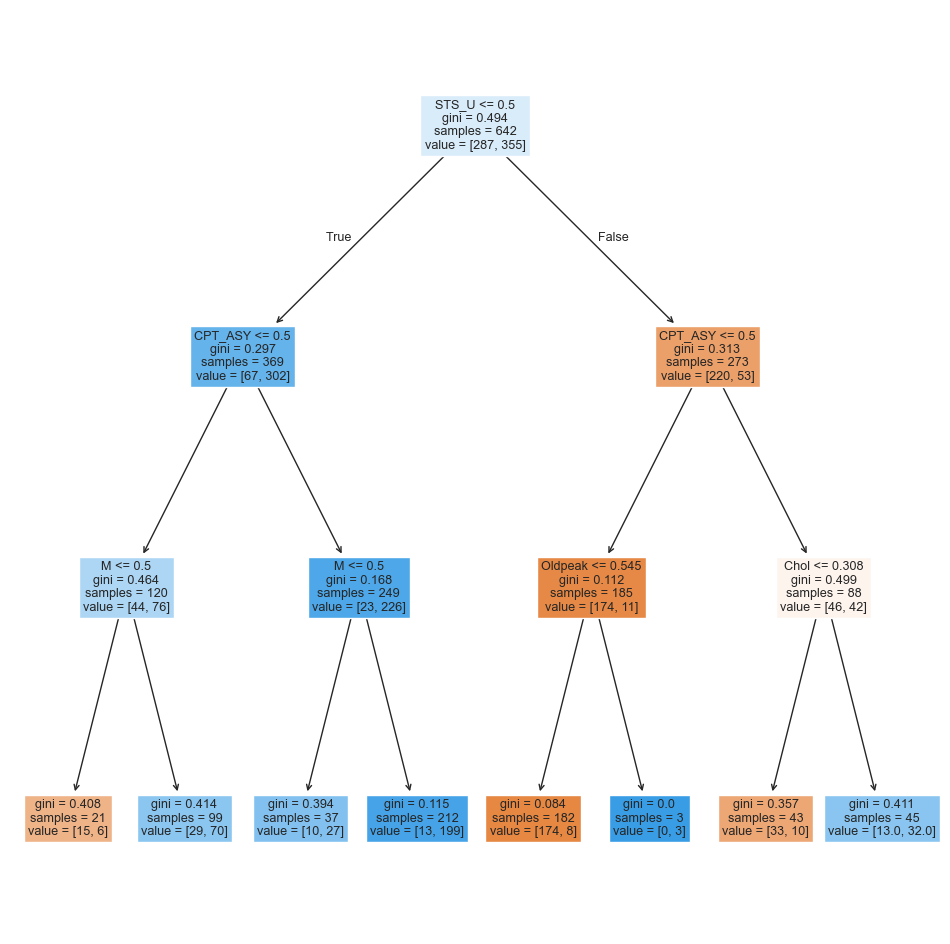

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(12, 12)) 
    plot_tree(model,
              feature_names=feature_names,
              filled=True)
    plt.show()

plot_decision_tree(DT, feature_names)

plt.show()

### 6.2 Logistic Regression

Here we does not have a built in model, but what we can do is plot a feature of a patient with its predicted probability made by the Logistic Regression model. Then, we can compare it with the true label of heart diesase.

In [368]:
indices = X_test.index
dataset_original = pd.read_csv("datasets/heartdata_imputed.csv")
original_data = dataset_original.loc[indices]
probabilities = LR.predict_proba(X_test)
y_pred = LR.predict(X_test)
original_data['Probabilities'] = probabilities[:, 1]
original_data['Log_predict'] = y_pred

In [369]:
original_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Probabilities,Log_predict
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0,0.303754,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0,0.076440,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0,0.029382,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,0.014045,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1,0.924446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,63,M,NAP,133,246.0,0,LVH,120,Y,1.0,Flat,1,0.771831,1
561,54,M,ATA,132,182.0,0,ST,141,N,0.1,Up,0,0.091185,0
76,32,M,ASY,118,529.0,0,Normal,130,N,0.0,Flat,1,0.920187,1
451,64,M,ASY,144,246.0,0,ST,122,Y,1.0,Flat,1,0.964578,1


In [370]:
def plot_logistic_regression(data, feature):
    df = data

    # ploting the result
    custom_palette = {0: 'blue', 1: 'orange'}
    # figure
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Probabilities', hue='HeartDisease', data=df, palette=custom_palette)
    plt.axhline(0.5, color='green', linestyle='--', label='threshold = 0.5')
    plt.xlabel(f"{feature}")
    plt.ylabel('Predicted Probability')
    plt.title(f'Logistic Regression Predicted Probabilities for {feature} and true disease')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

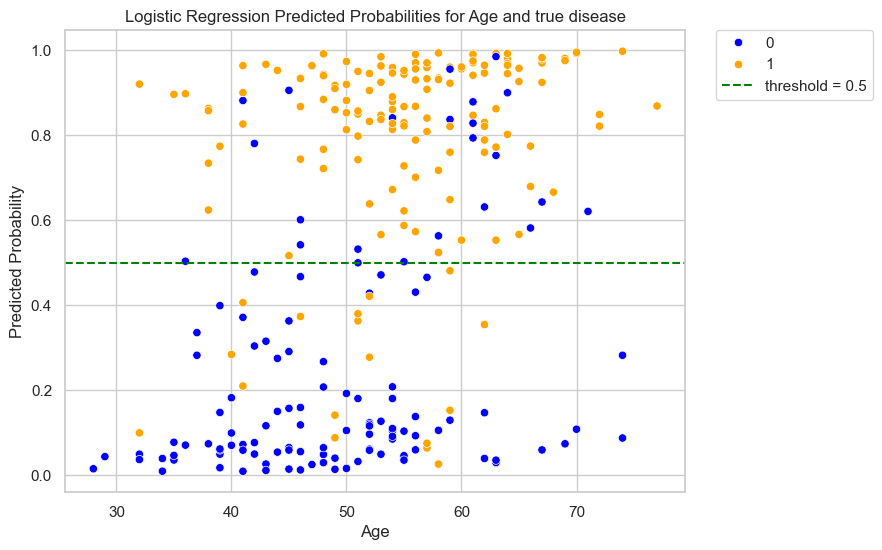

In [371]:
plot_logistic_regression(original_data, 'Age')

### 6.3 KNN

With KNN there is not a way to visualize the model for more than 2 dimensions, so let's simply plot a scatterplot for two variables and compare the predicted labels with the actual ones.

In [88]:
def plot_knn_comparison(df,feature1,feature2):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    sns.scatterplot(data=df, x=feature1, y=feature2, hue='HeartDisease', ax=ax1)
    ax1.set_title('True',fontsize=15,fontweight='bold')

    # Scatterplot con hue en KNN_Predict
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='KNN_Predict', ax=ax2)
    ax2.set_title('Prediction',fontsize=15,fontweight='bold')

    plt.tight_layout()
    plt.show()

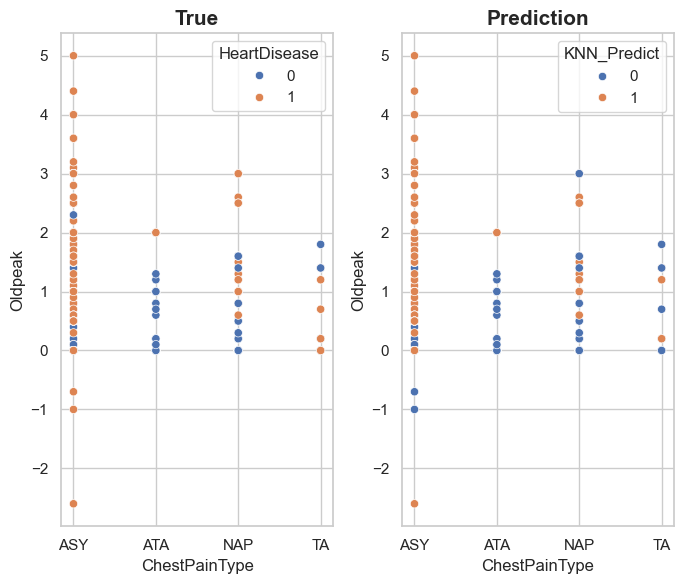

In [78]:
plot_knn_comparison(predict_dataset,'ChestPainType','Oldpeak')

### 6.3 SVM

It is the same case of KNN, there is not a way to visualize the model for more than 2 dimensions, so let's simply plot a scatterplot for two variables and compare the predicted labels with the actual ones.

In [87]:
def plot_svm_comparison(df,feature1,feature2):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    sns.scatterplot(data=df, x=feature1, y=feature2, hue='HeartDisease', ax=ax1)
    ax1.set_title('True',fontsize=15,fontweight='bold')

    # Scatterplot con hue en KNN_Predict
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='SVM_Predict', ax=ax2)
    ax2.set_title('Prediction',fontsize=15,fontweight='bold')

    plt.tight_layout()
    plt.show()

In [85]:
predict_dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Log_Prob,Log_Predict,KNN_Predict,SVM_Predict,Tree_Predict
747,42,M,ASY,140,226.0,0,Normal,178,N,0.0,Up,0,0.408035,0,0,0,0
197,42,M,ATA,150,268.0,0,Normal,136,N,0.0,Up,0,0.148935,0,0,0,0
467,63,F,ATA,132,231.5,0,Normal,130,N,0.1,Up,0,0.073004,0,0,0,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0,0.073004,0,0,0,0
198,53,M,ASY,120,246.0,0,Normal,116,Y,0.0,Flat,1,0.919596,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,63,M,NAP,133,246.0,0,LVH,120,Y,1.0,Flat,1,0.753949,1,1,1,1
561,54,M,ATA,132,182.0,0,ST,141,N,0.1,Up,0,0.148935,0,0,0,0
76,32,M,ASY,118,529.0,0,Normal,130,N,0.0,Flat,1,0.847666,1,1,1,1
451,64,M,ASY,144,246.0,0,ST,122,Y,1.0,Flat,1,0.919596,1,1,1,1


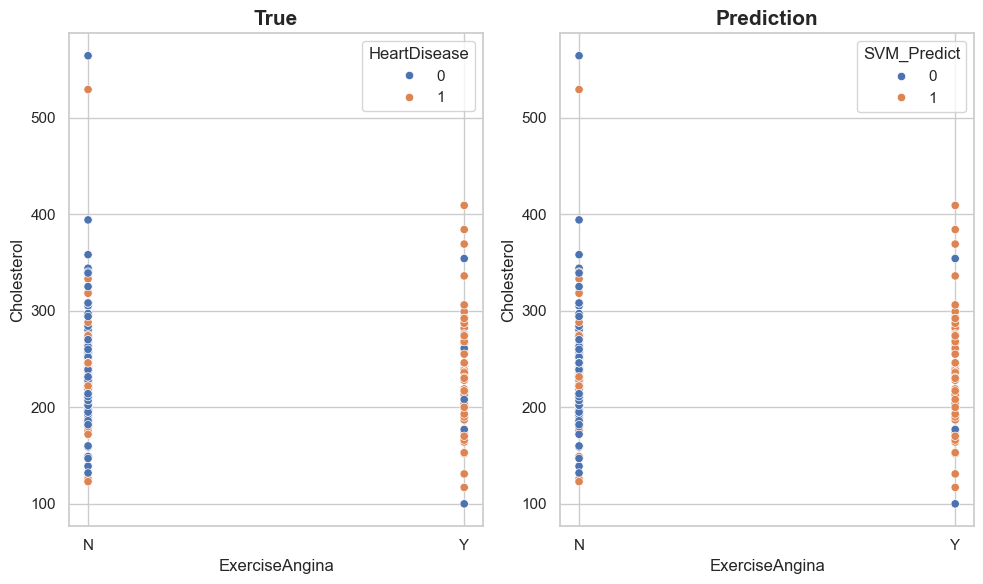

In [89]:
plot_svm_comparison(predict_dataset,'ExerciseAngina','Cholesterol')